In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# reading the dataset

In [93]:
df=pd.read_csv(r'E:\DATA SCIENCE\CODES and DOCS\DOCS\Car_Prices_Poland_Kaggle_org1.csv')
df.head()

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,gen-d-2011,2015,139568.0,1248,Diesel,Janki,Mazowieckie,35900.0
1,opel,combo,gen-d-2011,2018,31991.0,1499,Diesel,Katowice,Śląskie,78501.0
2,opel,combo,gen-d-2011,2015,278437.0,1598,Diesel,Brzeg,Opolskie,27000.0
3,opel,combo,gen-d-2011,2016,47600.0,1248,Diesel,Korfantów,Opolskie,30800.0
4,opel,combo,gen-d-2011,2014,103000.0,1400,CNG,Tarnowskie Góry,Śląskie,35900.0


In [94]:
df.shape

(3216, 10)

In [95]:
df.columns

Index(['mark', 'model', 'generation_name', 'year', 'mileage', 'vol_engine',
       'fuel', 'city', 'province', 'price'],
      dtype='object')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mark             3216 non-null   object 
 1   model            3216 non-null   object 
 2   generation_name  2950 non-null   object 
 3   year             3216 non-null   int64  
 4   mileage          3198 non-null   float64
 5   vol_engine       3216 non-null   int64  
 6   fuel             3216 non-null   object 
 7   city             3216 non-null   object 
 8   province         3216 non-null   object 
 9   price            3199 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 251.4+ KB


In [97]:
#Finding null values in the dataset
df.isna().sum()

mark                 0
model                0
generation_name    266
year                 0
mileage             18
vol_engine           0
fuel                 0
city                 0
province             0
price               17
dtype: int64

# Filling missing values

In [98]:
df['generation_name'].unique().size

10

In [99]:
df['generation_name'].mode()

0    gen-j-2009-2015
dtype: object

In [100]:
#filling the null values of column generation time with mode 
df['generation_name']=df['generation_name'].fillna('gen-j-2009-2015')


In [101]:
freq=df.select_dtypes(include=['float','int'])
freq

,mileage,price
0,139568.0,35900.0
1,31991.0,78501.0
2,278437.0,27000.0
3,47600.0,30800.0
4,103000.0,35900.0
...,...,...
3211,83282.0,48000.0
3212,100953.0,53900.0
3213,20800.0,68900.0
3214,6085.0,83900.0


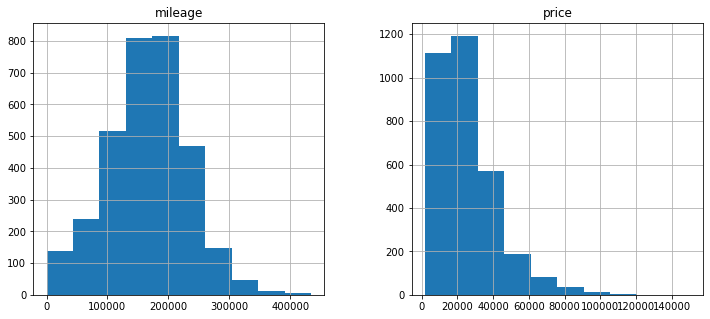

In [102]:
freq.hist(figsize=(12,5))
plt.show()

In [103]:
#Filling mileage with mean and price with median
df['mileage']=df['mileage'].fillna(df['mileage'].mean())
df['price']=df['price'].fillna(df['price'].mean())

In [104]:
df.isna().sum()

mark               0
model              0
generation_name    0
year               0
mileage            0
vol_engine         0
fuel               0
city               0
province           0
price              0
dtype: int64

In [105]:
df.groupby('model').mean()

,year,mileage,vol_engine,price
model,,,,
adam,2015.125000,73981.166667,1305.302083,35629.385417
agila,2007.845238,142339.880952,1125.000000,12466.166667
ampera,2013.100000,180200.900000,1258.200000,62070.000000
antara,2008.956250,188311.168750,2169.337500,28401.568750
astra,2010.452372,166330.250277,1562.736645,26257.515683
combo,2015.843750,140507.687500,1433.218750,39868.468750
vectra,2004.168000,231323.568000,1974.664000,10335.608000


In [106]:
df.groupby('mark').mean()

,year,mileage,vol_engine,price
mark,,,,
opel,2010.320585,166095.944028,1586.284204,26047.087215


In [107]:
df.vol_engine.nunique()

55

# Checking Outliers

<ipython-input-108-6c3cac7204d4>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Box plot for Mileage\n',fontSize=16)


Text(0.5, 1.0, 'Box plot for Mileage\n')

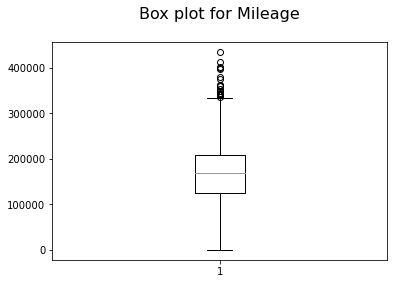

In [108]:
#For mileage
plt.boxplot(df['mileage'])
plt.title('Box plot for Mileage\n',fontSize=16)

In [109]:
Q1= np.percentile(df['mileage'],25,interpolation='midpoint')
Q2= np.percentile(df['mileage'],50,interpolation='midpoint')
Q3= np.percentile(df['mileage'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR


In [110]:
outlier=[]
for i in df['mileage']:
    if i<low_lim or i>up_lim:
        outlier.append(i)

In [111]:
outlier

[345000.0,
 401315.0,
 398119.0,
 375000.0,
 350000.0,
 400000.0,
 413000.0,
 363000.0,
 363000.0,
 379115.0,
 341000.0,
 354000.0,
 350000.0,
 341000.0,
 434400.0,
 340317.0,
 360000.0,
 340000.0,
 343000.0,
 339714.0,
 360000.0,
 350000.0,
 341667.0,
 348856.0,
 342765.0,
 335000.0,
 339600.0]

In [112]:
lis1=df['mileage']>up_lim
index_up=df.loc[lis1].index
lis2=df['mileage']<low_lim
index_low=df.loc[lis2].index

In [113]:
index_up

Int64Index([  66,   69,  158,  164,  171,  182,  475,  552,  584,  654,  752,
             774,  786,  859,  874,  915,  934, 1091, 1233, 1247, 1314, 1332,
            1416, 1425, 1466, 1474, 2180],
           dtype='int64')

In [114]:
index_low

Int64Index([], dtype='int64')

In [115]:
df.drop(index_up,inplace=True)

In [116]:
df.shape

(3189, 10)

<ipython-input-117-ccae18e1df43>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Box plot for price\n',fontSize=16)


Text(0.5, 1.0, 'Box plot for price\n')

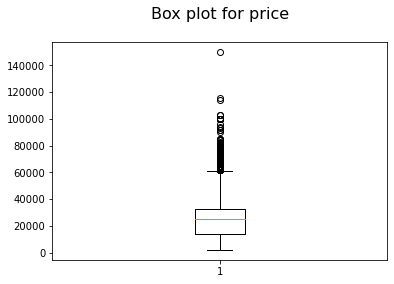

In [117]:
#Checking outliers for price
plt.boxplot(df['price'])
plt.title('Box plot for price\n',fontSize=16)

In [118]:
Q1= np.percentile(df['price'],25,interpolation='midpoint')
Q2= np.percentile(df['price'],50,interpolation='midpoint')
Q3= np.percentile(df['price'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [119]:
lis1=df['price']>up_lim
index_up=df.loc[lis1].index
lis2=df['price']<low_lim
index_low=df.loc[lis2].index

In [120]:
len(index_up)

131

In [121]:
len(index_low)

0

In [122]:
df.drop(index_up,inplace=True)

In [123]:
df.shape

(3058, 10)

# Feature reduction

In [124]:
df.head()

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,gen-d-2011,2015,139568.0,1248,Diesel,Janki,Mazowieckie,35900.0
2,opel,combo,gen-d-2011,2015,278437.0,1598,Diesel,Brzeg,Opolskie,27000.0
3,opel,combo,gen-d-2011,2016,47600.0,1248,Diesel,Korfantów,Opolskie,30800.0
4,opel,combo,gen-d-2011,2014,103000.0,1400,CNG,Tarnowskie Góry,Śląskie,35900.0
5,opel,combo,gen-d-2011,2017,121203.0,1598,Diesel,Warszawa,Mazowieckie,51900.0


In [125]:
df['mark'].nunique()

1

In [126]:
df['model'].nunique()

7

In [127]:
df['generation_name'].nunique()

9

In [128]:
df['fuel'].nunique()

5

In [129]:
df['city'].nunique()

795

In [130]:
df['province'].nunique()

16

In [131]:
#Dropping columns of mark, city, province and year since it doesnt have nothing to do with the prediction model
df.drop(['province','city','year','mark'],axis=1,inplace=True)

In [132]:
df.head()

,model,generation_name,mileage,vol_engine,fuel,price
0,combo,gen-d-2011,139568.0,1248,Diesel,35900.0
2,combo,gen-d-2011,278437.0,1598,Diesel,27000.0
3,combo,gen-d-2011,47600.0,1248,Diesel,30800.0
4,combo,gen-d-2011,103000.0,1400,CNG,35900.0
5,combo,gen-d-2011,121203.0,1598,Diesel,51900.0


# Encoding

Doing one hot encoding on Fuel and model

In [139]:
df1 = pd.get_dummies(data = df, columns=['fuel', 'model'])

In [150]:
df1.drop('generation_name',axis=1,inplace=True)

In [151]:
df1.head()

,mileage,vol_engine,price,fuel_CNG,fuel_Diesel,fuel_Gasoline,fuel_Hybrid,fuel_LPG,model_adam,model_agila,model_ampera,model_antara,model_astra,model_combo,model_vectra
0,139568.0,1248,35900.0,0,1,0,0,0,0,0,0,0,0,1,0
2,278437.0,1598,27000.0,0,1,0,0,0,0,0,0,0,0,1,0
3,47600.0,1248,30800.0,0,1,0,0,0,0,0,0,0,0,1,0
4,103000.0,1400,35900.0,1,0,0,0,0,0,0,0,0,0,1,0
5,121203.0,1598,51900.0,0,1,0,0,0,0,0,0,0,0,1,0


In [152]:
df1.head()

,mileage,vol_engine,price,fuel_CNG,fuel_Diesel,fuel_Gasoline,fuel_Hybrid,fuel_LPG,model_adam,model_agila,model_ampera,model_antara,model_astra,model_combo,model_vectra
0,139568.0,1248,35900.0,0,1,0,0,0,0,0,0,0,0,1,0
2,278437.0,1598,27000.0,0,1,0,0,0,0,0,0,0,0,1,0
3,47600.0,1248,30800.0,0,1,0,0,0,0,0,0,0,0,1,0
4,103000.0,1400,35900.0,1,0,0,0,0,0,0,0,0,0,1,0
5,121203.0,1598,51900.0,0,1,0,0,0,0,0,0,0,0,1,0


# Correlation analysis

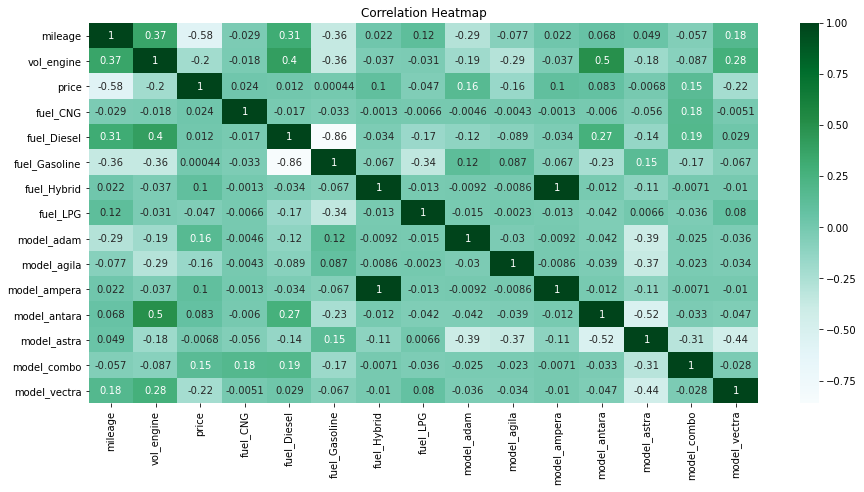

In [153]:
plt.figure(figsize = (15, 7))
sns.heatmap(data = df1.corr(), annot= True, cmap = 'BuGn')
plt.title('Correlation Heatmap')
plt.show()


In [143]:
#Since all the corr values are less than 0.5 so we dont have to drop any fields

# Standardization / Normalization

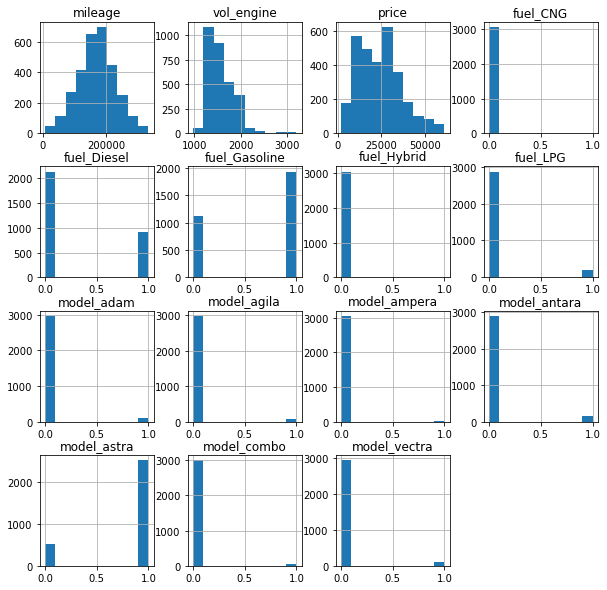

In [154]:
df1.hist(figsize = (10, 10))
plt.show()

In [156]:
X_columns = df1.columns

from sklearn.preprocessing import StandardScaler
X = pd.DataFrame(StandardScaler().fit_transform(df1), columns=X_columns)


In [157]:
X.describe()

,mileage,vol_engine,price,fuel_CNG,fuel_Diesel,fuel_Gasoline,fuel_Hybrid,fuel_LPG,model_adam,model_agila,model_ampera,model_antara,model_astra,model_combo,model_vectra
count,3.058000e+03,3.058000e+03,3.058000e+03,3.058000e+03,3.058000e+03,3.058000e+03,3.058000e+03,3.058000e+03,3.058000e+03,3.058000e+03,3.058000e+03,3.058000e+03,3.058000e+03,3.058000e+03,3.058000e+03
mean,4.833718e-16,-1.919064e-15,-8.550678e-16,-7.085931e-16,2.028753e-16,-1.021347e-15,-1.644645e-15,-1.627940e-16,6.905947e-15,7.537608e-15,-1.644645e-15,9.485799e-15,-1.143283e-14,8.690581e-15,-1.754301e-15
std,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00
min,-2.759566e+00,-2.300629e+00,-1.786963e+00,-2.558223e-02,-6.585298e-01,-1.308968e+00,-5.121475e-02,-2.588288e-01,-1.790589e-01,-1.680619e-01,-5.121475e-02,-2.341933e-01,-2.201599e+00,-1.390444e-01,-2.012212e-01
25%,-6.690659e-01,-8.548539e-01,-8.224034e-01,-2.558223e-02,-6.585298e-01,-1.308968e+00,-5.121475e-02,-2.588288e-01,-1.790589e-01,-1.680619e-01,-5.121475e-02,-2.341933e-01,4.542154e-01,-1.390444e-01,-2.012212e-01
50%,5.833393e-03,1.039280e-02,-1.524043e-02,-2.558223e-02,-6.585298e-01,7.639604e-01,-5.121475e-02,-2.588288e-01,-1.790589e-01,-1.680619e-01,-5.121475e-02,-2.341933e-01,4.542154e-01,-1.390444e-01,-2.012212e-01
75%,6.638602e-01,3.357847e-01,5.982035e-01,-2.558223e-02,1.518534e+00,7.639604e-01,-5.121475e-02,-2.588288e-01,-1.790589e-01,-1.680619e-01,-5.121475e-02,-2.341933e-01,4.542154e-01,-1.390444e-01,-2.012212e-01
max,2.758275e+00,5.915516e+00,2.971263e+00,3.908964e+01,1.518534e+00,7.639604e-01,1.952562e+01,3.863558e+00,5.584754e+00,5.950190e+00,1.952562e+01,4.269977e+00,4.542154e-01,7.191950e+00,4.969656e+00


# Linaer Regression

In [158]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from scipy.stats.stats import pearsonr

In [162]:
y=X['price']
x=X.drop(['price'],axis=1)
x.shape

(3058, 14)

In [165]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.25)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions= model.predict(x_test)

In [166]:
print('mean squared error when all independant variables are considered is %0.3f '%(mean_squared_error(predictions,y_test)))

mean squared error when all independant variables are considered is 0.488 


In [167]:
R2Score= model.score(x_train,y_train)
R2Score

0.47415990048174594

In [168]:
#MSC values shows that it is a good model